# データ解析
人口と空き家率の関係等を"ちょっと"解析する

## 必要なものをインポート

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pydotplus
from IPython.display import Image
from graphviz import Digraph

#機械学習(今回は回帰)に必要なもののインポート
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import tree

## エクセルデータをdf(Data Frame)にいれる
特徴として一応都道府県の面積を入れてある

In [293]:
df =  pd.read_excel("./data.xlsx")
df2 = pd.read_excel("./data2.xlsx")

In [294]:
df

,ken,akiya,kyojyuti5,pop,akiya/pop,area
0,北海道,377900,24.6,5384,70.189450,83457
1,青森県,88100,18.2,1309,67.303285,9645
2,岩手県,92900,21.3,1280,72.578125,15279
3,宮城県,129700,25.7,2334,55.569837,6862
4,秋田県,59900,15.0,1023,58.553275,11636
5,山形県,53900,16.8,1123,47.996438,6652
6,福島県,123200,20.7,1914,64.367816,13783
7,茨城県,196200,18.8,2918,67.237834,6096
8,栃木県,161000,19.1,1975,81.518987,6408
9,群馬県,157000,19.1,1973,79.574252,6362


In [295]:
df2

,ken,akiya,pop,area
0,北海道,13.5,5286,83457
1,青森県,15.0,1263,9645
2,岩手県,16.1,1241,15279
3,宮城県,12.0,2316,6862
4,秋田県,13.6,981,11636
5,山形県,12.1,1090,6652
6,福島県,14.3,1864,13783
7,茨城県,14.8,2877,6096
8,栃木県,17.3,1946,6408
9,群馬県,16.7,1952,6362


## まずは簡単な回帰を行う
入力を人口、出力を空き家率

係数:[[-0.00050898]] 切片:[16.39056061]
決定係数:0.2751155997354131
⇒決定係数は良くない(1に近いほど基本的に良い)


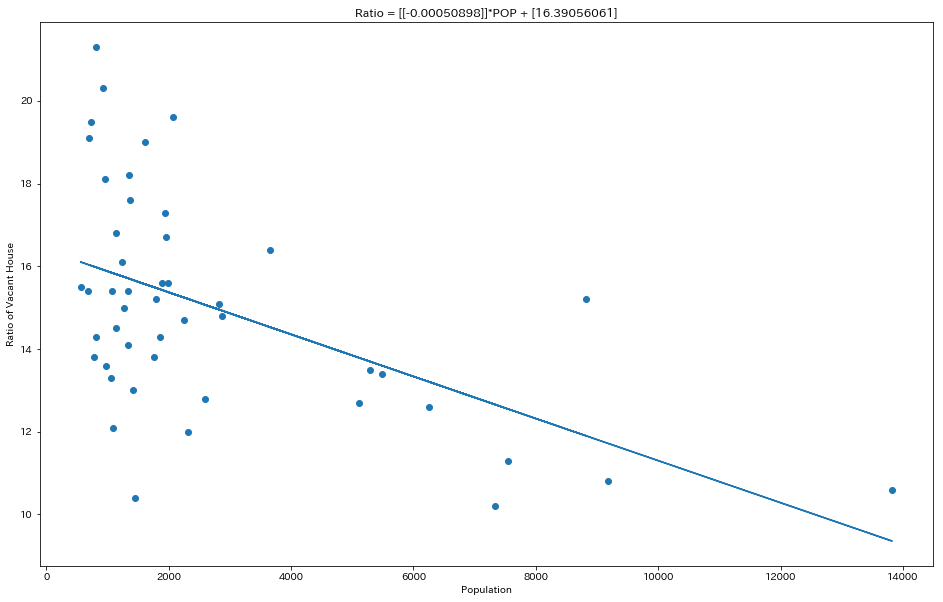

In [296]:
X = df2["pop"].values.reshape(-1,1)
Y = df2["akiya"].values.reshape(-1,1)

model = LinearRegression()
model.fit(X,Y)
print("係数:{} 切片:{}".format(model.coef_,model.intercept_))
print("決定係数:{}".format(model.score(X,Y)))
print("⇒決定係数は良くない(1に近いほど基本的に良い)")
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.set_xlabel("Population")
ax.set_ylabel("Ratio of Vacant House")
ax.set_title("Ratio = {}*POP + {}".format(model.coef_,model.intercept_))
ax.scatter(X,Y)
ax.plot(X,model.predict(X))

## 基底関数を入れて、特徴量に一度関数をかます.
⇒モデルの表現力を上げる  
⇒あまり良くなっていない  
⇒基底関数のかけ方間違ってるかも？私の理解が足りないかも？  

基底関数を使う  
⇒つまり、y=a*x + bではなく、y=a_0 + a_1*x + a_2*x^2 + .... のようにすれば、直線以外を表現できる 

係数:[[ 0.00000000e+00 -8.55841024e-04  3.07216600e-08]] 切片:[16.8711736]
決定係数:0.28964222673875806


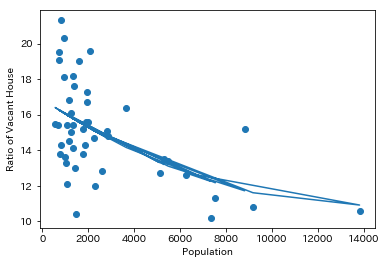

In [297]:
X = df2["pop"].values.reshape(-1,1)
Y = df2["akiya"].values.reshape(-1,1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Population")
ax.set_ylabel("Ratio of Vacant House")
ax.scatter(X,Y)

poly_func = PolynomialFeatures(2)
X2 = poly_func.fit_transform(X)
model.fit(X2,Y)

ax.plot(X,model.predict(X2))
print("係数:{} 切片:{}".format(model.coef_,model.intercept_))
print("決定係数:{}".format(model.score(X2,Y)))

<br>
## 人口が3000(単位略)以下のみを回帰してみる
⇒上のグラフを見て、3000以下ならいけそう？と思ったから  
⇒結果は全然ダメ  ⇒なぜ？何が間違ってる？

係数:[[-0.00096063]] 切片:[17.05805185]
決定係数:0.05572307373581731


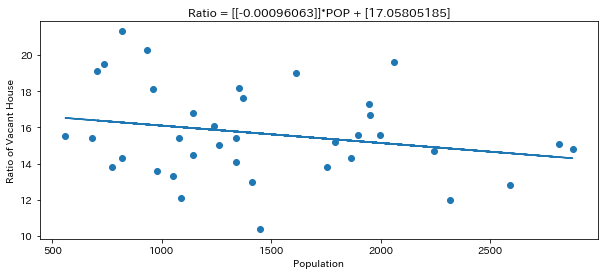

In [298]:
X = df2[df2["pop"]<=3000]["pop"].values.reshape(-1,1)
Y = df2[df2["pop"]<=3000]["akiya"].values.reshape(-1,1)

model = LinearRegression()
model.fit(X,Y)
print("係数:{} 切片:{}".format(model.coef_,model.intercept_))
print("決定係数:{}".format(model.score(X,Y)))

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.set_xlabel("Population")
ax.set_ylabel("Ratio of Vacant House")
ax.set_title("Ratio = {}*POP + {}".format(model.coef_,model.intercept_))
ax.scatter(df2[df2["pop"]<=3000]["pop"],df2[df2["pop"]<=3000]["akiya"])
ax.plot(df2[df2["pop"]<=3000]["pop"].values.reshape(-1,1),model.predict(df2[df2["pop"]<=3000]["pop"].values.reshape(-1,1)))

<br>
## dfの特徴(県以外)をすべて使ってみる
⇒決定係数がほぼ1に  
⇒なぜ？？

In [299]:
X = df.drop("ken",axis=1).values
Y = df2["akiya"].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
print("係数:{} 切片:{}".format(model.coef_,model.intercept_))
print("決定係数:{}".format(model.score(X,Y)))

係数:[[ 2.19642016e-06 -1.33173629e-01 -3.05669824e-04  1.48382219e-01
  -2.06223249e-06]] 切片:[7.59025032]
決定係数:0.9762554067322344


## 結果のデータフレームを作成し、見てみる
Ground Truth ⇒ 真の値  
かなり近い値を予測できている

In [300]:
result = pd.DataFrame({"Prefecture": df["ken"],"Ground Truth": Y.reshape(-1),"Prediction": model.predict(X).reshape(-1)}) 
result 

,Prefecture,Ground Truth,Prediction
0,北海道,13.5,13.741239
1,青森県,15.0,14.926594
2,岩手県,16.1,15.304236
3,宮城県,12.0,11.970555
4,秋田県,13.6,14.075780
5,山形県,12.1,12.236153
6,福島県,14.3,14.041719
7,茨城県,14.8,14.589907
8,栃木県,17.3,16.879313
9,群馬県,16.7,16.582670


<br>
## 訓練データとテストデータを分けてみる
⇒train_test_split関数で分ける  
⇒決定係数なお良い

In [301]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=0)

In [302]:
model = LinearRegression()
model.fit(X_train,Y_train)
print("係数:{} 切片:{}".format(model.coef_,model.intercept_))
print("決定係数:{}".format(model.score(X_test,Y_test)))

係数:[[ 1.29129962e-05 -1.70964513e-01 -8.90513454e-04  1.32230891e-01
  -9.70092013e-06]] 切片:[9.25734143]
決定係数:0.9226738279145454


<br>
# 興味:他モデルではどうか？？何が聞いているのか？交差検証等、本当に正しいのか？

## 決定木を用いてやってみた(ラスト)
⇒可視化してみるとakiya/popが利いている.  
⇒最後は空き家率を入れて、空き家率で昇順ソートをしたデータフレームで確認した

決定係数:0.6325304628517783


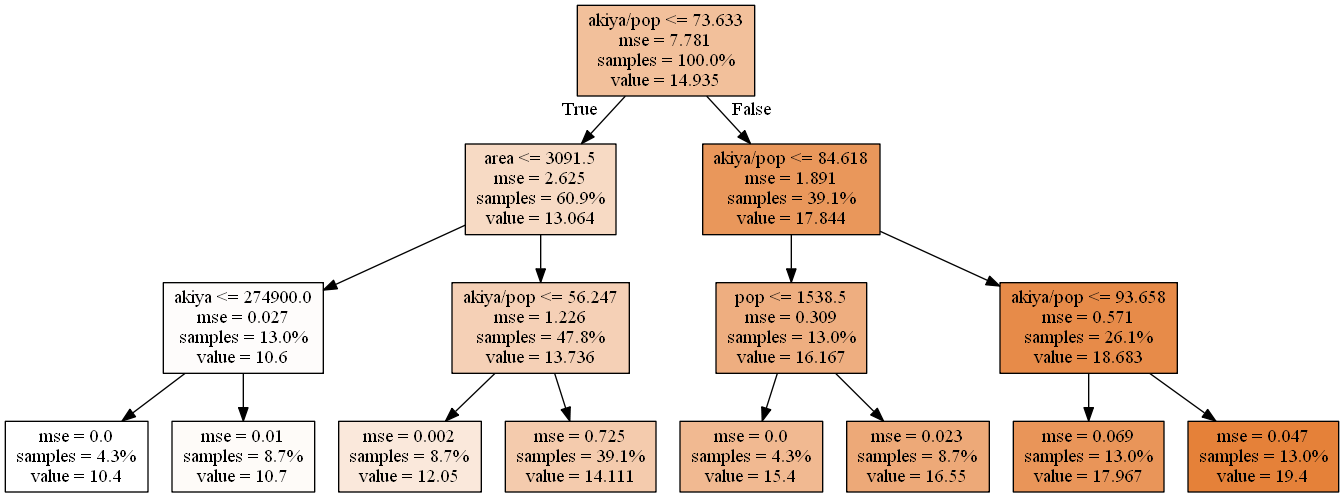

In [303]:
feature_names = list(df.drop(["ken"],axis=1).columns.values)

DT = DecisionTreeRegressor(max_depth=3)
DT = DT.fit(X_train,Y_train)
print("決定係数:{}".format(DT.score(X_test,Y_test)))

plt.figure(figsize=(5,5))
dot_data = tree.export_graphviz(DT,out_file=None,feature_names=feature_names,filled=True,proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data) #C:\Users\User\Anaconda3\Library\bin\graphviz
Image(graph.create_png())

In [304]:
df["Ratio of Akiya"] = Y
df = df.sort_values("Ratio of Akiya")
df

,ken,akiya,kyojyuti5,pop,akiya/pop,area,Ratio of Akiya
10,埼玉県,346200,20.4,7261,47.679383,3768,10.2
46,沖縄県,66800,27.2,1434,46.582985,2277,10.4
12,東京都,809200,27.3,13514,59.878644,2104,10.6
13,神奈川県,483000,23.2,9127,52.919908,2416,10.8
22,愛知県,390600,22.3,7484,52.191342,5116,11.3
3,宮城県,129700,25.7,2334,55.569837,6862,12.0
5,山形県,53900,16.8,1123,47.996438,6652,12.1
11,千葉県,381100,20.9,6224,61.230720,5082,12.6
39,福岡県,327300,25.5,5103,64.138742,4847,12.7
25,京都府,171800,20.7,2610,65.823755,4613,12.8


In [305]:
90000/835000

0.10778443113772455